In [19]:
import cv2
import numpy as np
from cv2 import imread
import matplotlib.pyplot as plt


In [20]:
def howis(img):
  print('size = ',img.shape)
  print('max  = ',np.max(img))
  print('min  = ',np.min(img))

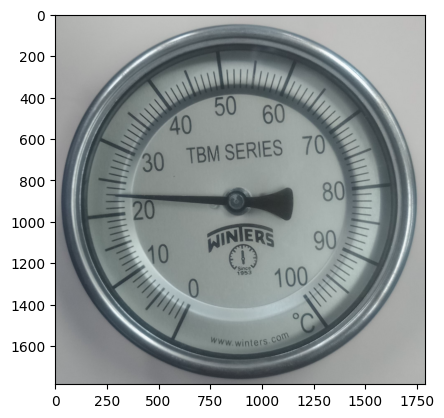

In [21]:
img = imread('sensor.jpg')
plt.imshow(img)
plt.show()

In [22]:
howis(img)

size =  (1786, 1786, 3)
max  =  255
min  =  24


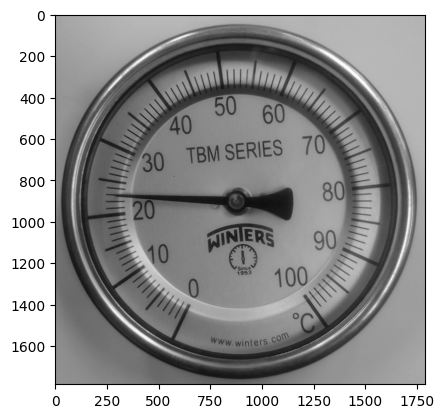

In [23]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')
plt.show()

In [24]:
howis(img_gray)

size =  (1786, 1786)
max  =  255
min  =  33


In [25]:
hist = cv2.calcHist([img_gray], [0], None, [256], [0, 256])

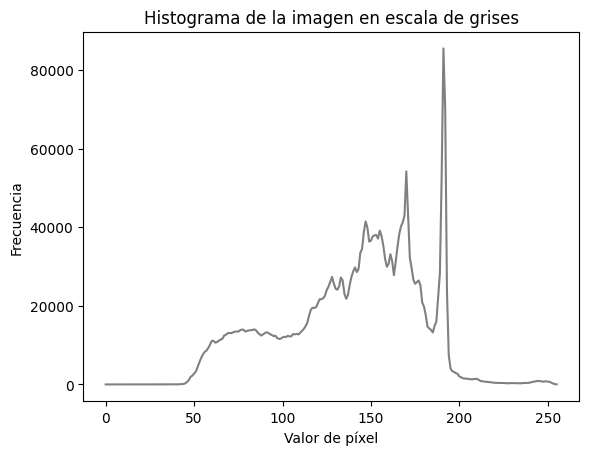

In [26]:
# Mostrar el histograma
plt.plot(hist, color='gray')
plt.xlabel('Valor de píxel')
plt.ylabel('Frecuencia')
plt.title('Histograma de la imagen en escala de grises')
plt.show()

In [27]:
def segmenta(X,t):
  (N,M) = img_gray.shape
  Y = np.zeros((N,M))
  area = 0
  for i in range(N):
    for j in range(M):
      if X[i,j] > t:
        Y[i,j] = 255
        area = area + 1
  print('area = ',area)
  return Y

area =  3160400
size =  (1786, 1786)
max  =  255.0
min  =  0.0


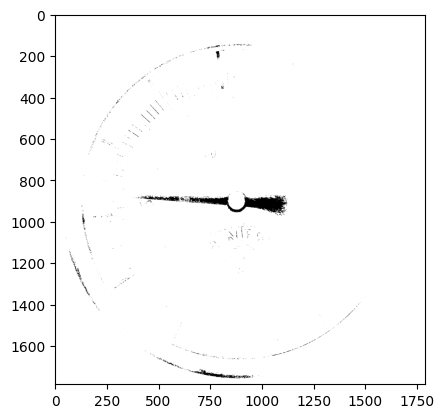

In [85]:
Y = segmenta(img_gray,54) # good threshold is 120
howis(Y)
plt.imshow(Y, cmap='gray')
plt.show()

In [73]:
# Aplicar el algoritmo de Canny para detectar bordes
edges = cv2.Canny(img_gray, 100, 120)

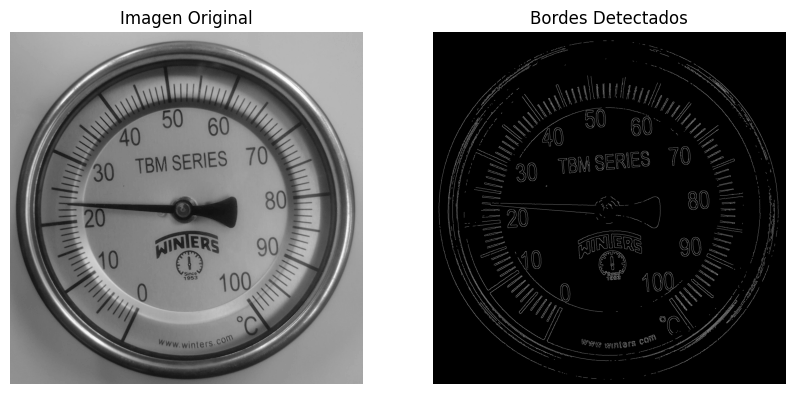

In [74]:
# Mostrar la imagen original y los bordes detectados
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Bordes Detectados')
plt.axis('off')

plt.show()

In [76]:
import cv2
import numpy as np
from skimage.morphology import skeletonize

# Read image
img = cv2.imread('sensor.jpg')
hh, ww = img.shape[:2]

# convert to gray
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# threshold
thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)[1]

# invert so shapes are white on black background
thresh = 255 - thresh

# get contours and save area
cntrs_info = []
contours = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
index=0
for cntr in contours:
    area = cv2.contourArea(cntr)
    cntrs_info.append((index,area))
    index = index + 1

# sort contours by area
def takeSecond(elem):
    return elem[1]
cntrs_info.sort(key=takeSecond, reverse=True)

# get third largest contour
arms = np.zeros_like(thresh)
index_third = cntrs_info[2][0]
cv2.drawContours(arms,[contours[index_third]],0,(1),-1)

#arms=cv2.ximgproc.thinning(arms)
arms_thin = skeletonize(arms)
arms_thin = (255*arms_thin).clip(0,255).astype(np.uint8)

# get hough lines and draw on copy of input
result = img.copy()
lineThresh = 15
minLineLength = 20
maxLineGap = 100
max
lines = cv2.HoughLinesP(arms_thin, 1, np.pi/180, lineThresh, None, minLineLength, maxLineGap)

for [line] in lines:
    x1 = line[0]
    y1 = line[1]
    x2 = line[2]
    y2 = line[3]
    cv2.line(result, (x1,y1), (x2,y2), (0,0,255), 2)   

In [ ]:
# save results
cv2.imwrite('clock_thresh.jpg', thresh)
cv2.imwrite('clock_arms.jpg', (255*arms).clip(0,255).astype(np.uint8))
cv2.imwrite('clock_arms_thin.jpg', arms_thin)
cv2.imwrite('clock_lines.jpg', result)

cv2.imshow('thresh', thresh)
cv2.imshow('arms', (255*arms).clip(0,255).astype(np.uint8))
cv2.imshow('arms_thin', arms_thin)
cv2.imshow('result', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

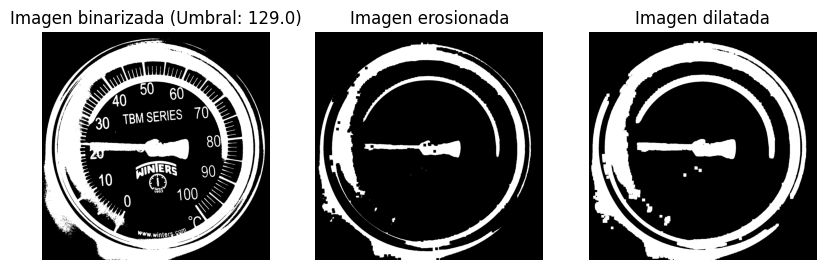

In [88]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Lee la imagen
imagePath = "../data/sensor.jpg"
inputImage = cv2.imread(imagePath)

# Almacena una copia profunda para los resultados
originalImg = inputImage.copy()

# Convertir a escala de grises
grayInput = cv2.cvtColor(inputImage, cv2.COLOR_BGR2GRAY)

# Umbralización mediante Otsu + ajuste de sesgo
threshValue, binaryImage = cv2.threshold(grayInput, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Define el número de iteraciones de la operación morfológica
opIterations = 10

# Obtener el elemento estructurante
structuringElement = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Realizar Erosión
erodeImg = cv2.morphologyEx(binaryImage, cv2.MORPH_ERODE, structuringElement, None, None, opIterations, cv2.BORDER_REFLECT101)

# Realizar Dilatación
dilateImg = cv2.morphologyEx(erodeImg, cv2.MORPH_DILATE, structuringElement, None, None, opIterations, cv2.BORDER_REFLECT101)

# Mostrar las imágenes
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.imshow(binaryImage, cmap='gray')
plt.title('Imagen binarizada (Umbral: {})'.format(threshValue))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(erodeImg, cmap='gray')
plt.title('Imagen erosionada')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(dilateImg, cmap='gray')
plt.title('Imagen dilatada')
plt.axis('off')

plt.show()
